# Load Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

%matplotlib inline

# Load Data

In [2]:
test = pd.read_csv('/Users/xiaolingliu/Google_Drive/case_download/Collections_of_DS_FULL/Datasets/Translation_Test/test_table.csv')
user = pd.read_csv('/Users/xiaolingliu/Google_Drive/case_download/Collections_of_DS_FULL/Datasets/Translation_Test/user_table.csv')

In [3]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [5]:
test.describe(include = 'all')

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
count,453321.000000,453321,453321,453321,453321,181877,453321,453321.000000,453321.000000
unique,NaN,5,3,2,3,5,7,NaN,NaN
top,NaN,2015-12-04,Ads,Web,ES,Facebook,Android_App,NaN,NaN
freq,NaN,141163,181877,251565,377547,68425,155135,NaN,NaN
mean,499937.514728,NaN,NaN,NaN,NaN,NaN,NaN,0.049579,0.476446
std,288665.193436,NaN,NaN,NaN,NaN,NaN,NaN,0.217073,0.499445
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,249816.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,500019.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,749522.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000


In [6]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [8]:
user.describe(include = 'all')

,user_id,sex,age,country
count,452867.000000,452867,452867.000000,452867
unique,NaN,2,NaN,17
top,NaN,M,NaN,Mexico
freq,NaN,264485,NaN,128484
mean,499944.805166,NaN,27.130740,NaN
std,288676.264784,NaN,6.776678,NaN
min,1.000000,NaN,18.000000,NaN
25%,249819.000000,NaN,22.000000,NaN
50%,500019.000000,NaN,26.000000,NaN
75%,749543.000000,NaN,31.000000,NaN


# Merge Data

In [9]:
print('Test Id:\t', len(test['user_id'].unique()), '\t', len(test) == len(test['user_id'].unique()))
print('User Id:\t', len(user['user_id'].unique()), '\t', len(user) == len(user['user_id'].unique()))

Test Id:	 453321 	 True
User Id:	 452867 	 True


In [10]:
# Merge tables
data = pd.merge(left = test, right = user, how = 'left', on = 'user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [12]:
data.describe(include = 'all')

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
count,453321.000000,453321,453321,453321,453321,181877,453321,453321.000000,453321.000000,452867,452867.000000,452867
unique,NaN,5,3,2,3,5,7,NaN,NaN,2,NaN,17
top,NaN,2015-12-04,Ads,Web,ES,Facebook,Android_App,NaN,NaN,M,NaN,Mexico
freq,NaN,141163,181877,251565,377547,68425,155135,NaN,NaN,264485,NaN,128484
mean,499937.514728,NaN,NaN,NaN,NaN,NaN,NaN,0.049579,0.476446,NaN,27.130740,NaN
std,288665.193436,NaN,NaN,NaN,NaN,NaN,NaN,0.217073,0.499445,NaN,6.776678,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,18.000000,NaN
25%,249816.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,22.000000,NaN
50%,500019.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,26.000000,NaN
75%,749522.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,31.000000,NaN


# Exploratory Data Analysis

Text(0.5, 1.0, 'Conversion Rate of Country')

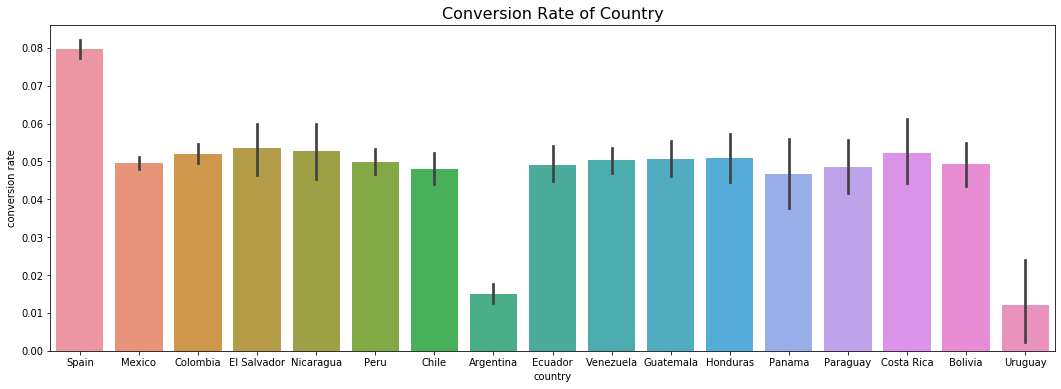

In [13]:
fig, ax = plt.subplots(figsize = (18, 6))

sns.barplot('country', 'conversion', data = data[data['test'] == 0], ax = ax)
ax.set_ylabel('conversion rate')
ax.set_title('Conversion Rate of Country', fontsize = 16)

### It's true that Spain converts much better than the rest of LatAm countries.

## Check test result

In [14]:
# Notice not to include Spain data here
print('Conversion rate for old version', 
      data.loc[(data['country'] != 'Spain') & (data['test'] == 0)]['conversion'].mean())
print('Conversion rate for new version', 
      data.loc[(data['country'] != 'Spain') & (data['test'] == 1)]['conversion'].mean())

Conversion rate for old version 0.04833042316066309
Conversion rate for new version 0.043424713982118966


#### Control group is converting at 4.8% while test group at 4.3%, which is 10% drop. This would be dramatic if it were true.

## Data Analysis on A/B Testing dataset

In [15]:
data = data[data['country'] != 'Spain']
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico


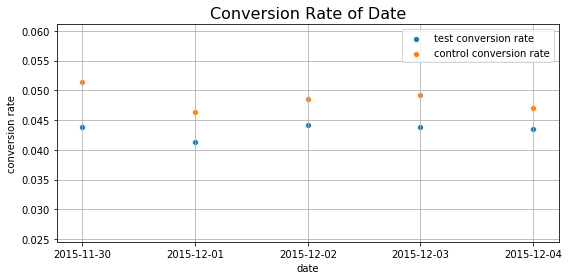

In [18]:
# Visualization of Data
date_test = data[data['test'] == 1][['date', 'conversion']].groupby('date').mean().reset_index()
date_cont = data[data['test'] == 0][['date', 'conversion']].groupby('date').mean().reset_index()

fig, ax = plt.subplots(figsize = (9,4))

sns.scatterplot('date', 'conversion', data = date_test, ax = ax, label = 'test conversion rate')
sns.scatterplot('date', 'conversion', data = date_cont, ax = ax, label = 'control conversion rate')
ax.set_title('Conversion Rate of Date', fontsize = 16)
ax.set_ylabel('conversion rate')
ax.grid(True)

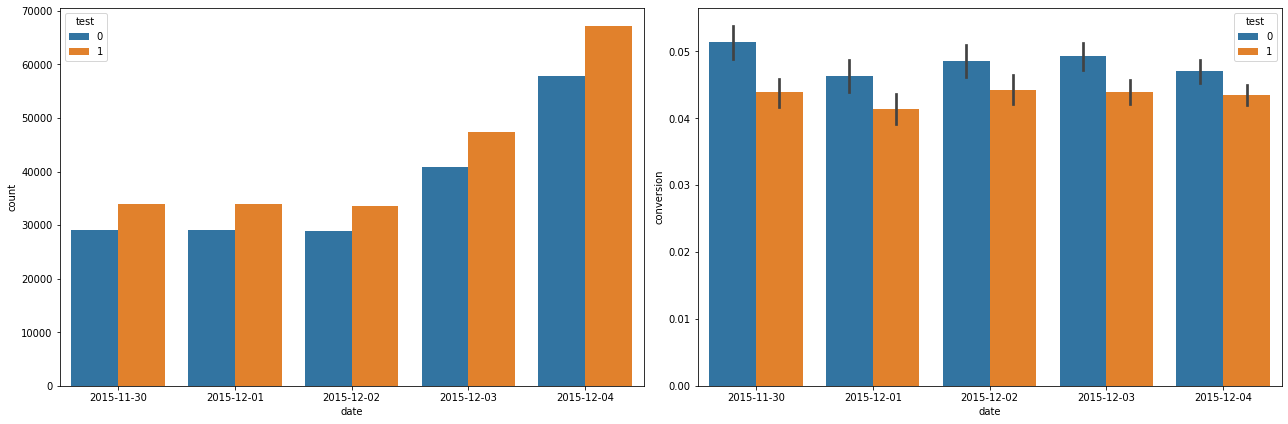

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))

sns.countplot('date', hue = 'test', data = data, ax = ax[0], 
              order = ('2015-11-30', '2015-12-01', '2015-12-02','2015-12-03', '2015-12-04'))
sns.barplot('date', 'conversion', hue = 'test', data = data, ax = ax[1], 
            order = ('2015-11-30', '2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04'))

plt.tight_layout()

#### From the plot, we notice a couple of things:
#### 1. Conversion rate of test is constantly worse than conversion rate of control group and there is relatively little variance across days. That probably means that we do have enough data, but there was some bias in the experiment set up.
#### 2. On a side note, we just ran the test for 5 days. We should always run the test for at least 1 full week to capture weekly patterns, 2 weeks would be much better.

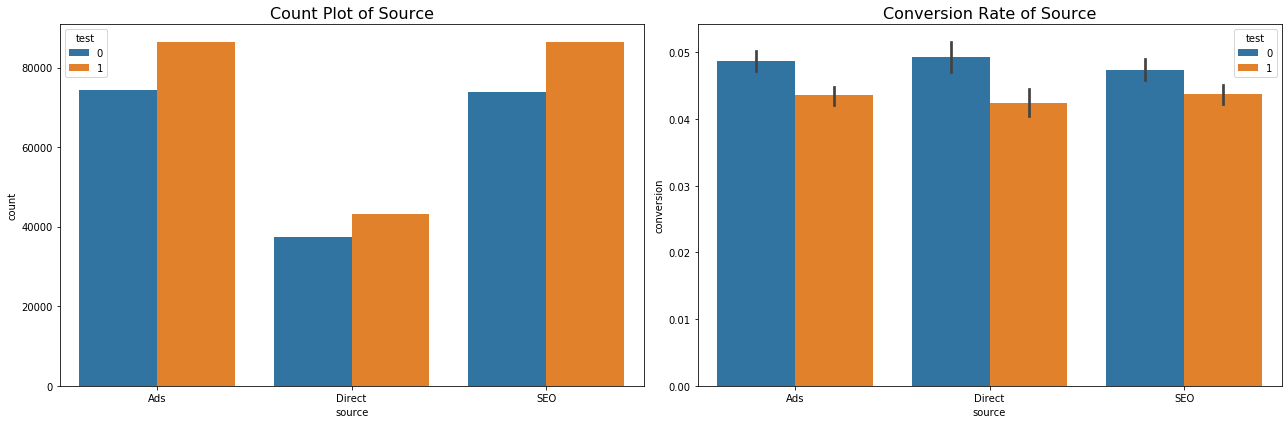

In [21]:
# Visualization of source
fig, ax = plt.subplots(1, 2, figsize = (18,6))

sns.countplot('source', hue = 'test', data = data, ax = ax[0])
ax[0].set_title('Count Plot of Source', fontsize = 16)

sns.barplot('source', 'conversion', hue = 'test', data = data, ax = ax[1])
ax[1].set_title('Conversion Rate of Source', fontsize = 16)

plt.tight_layout()

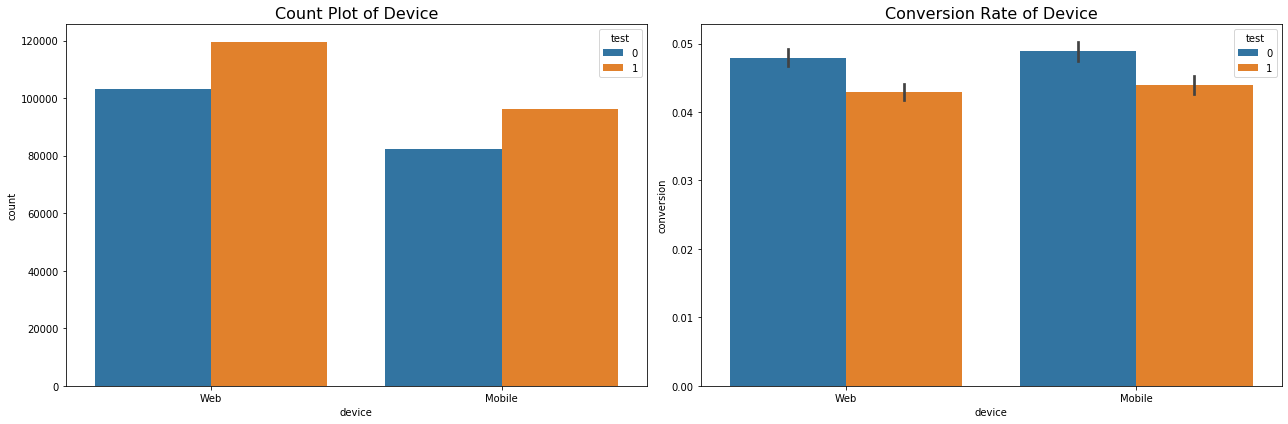

In [22]:
# Visualization of device
fig, ax = plt.subplots(1, 2, figsize = (18,6))

sns.countplot('device', hue = 'test', data = data, ax = ax[0])
ax[0].set_title('Count Plot of Device', fontsize = 16)

sns.barplot('device', 'conversion', hue = 'test', data = data, ax = ax[1])
ax[1].set_title('Conversion Rate of Device', fontsize = 16)

plt.tight_layout()

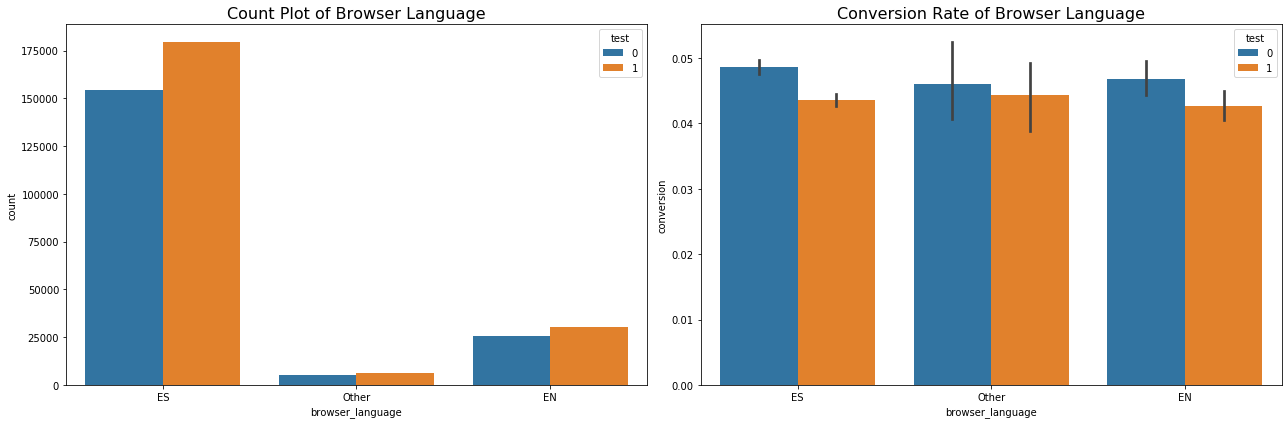

In [23]:
# Visualization of browser language
fig, ax = plt.subplots(1, 2, figsize = (18,6))

sns.countplot('browser_language', hue = 'test', data = data, ax = ax[0])
ax[0].set_title('Count Plot of Browser Language', fontsize = 16)

sns.barplot('browser_language', 'conversion', hue = 'test', data = data, ax = ax[1])
ax[1].set_title('Conversion Rate of Browser Language', fontsize = 16)

plt.tight_layout()

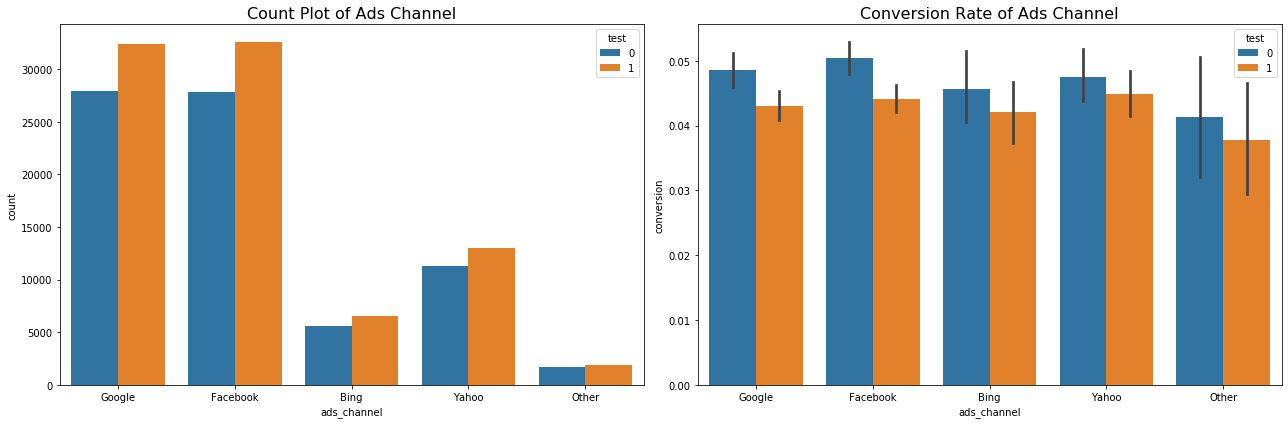

In [24]:
# Visualization of ads channel
fig, ax = plt.subplots(1, 2, figsize = (18,6))

sns.countplot('ads_channel', hue = 'test', data = data, ax = ax[0])
ax[0].set_title('Count Plot of Ads Channel', fontsize = 16)

sns.barplot('ads_channel', 'conversion', hue = 'test', data = data, ax = ax[1])
ax[1].set_title('Conversion Rate of Ads Channel', fontsize = 16)

plt.tight_layout()

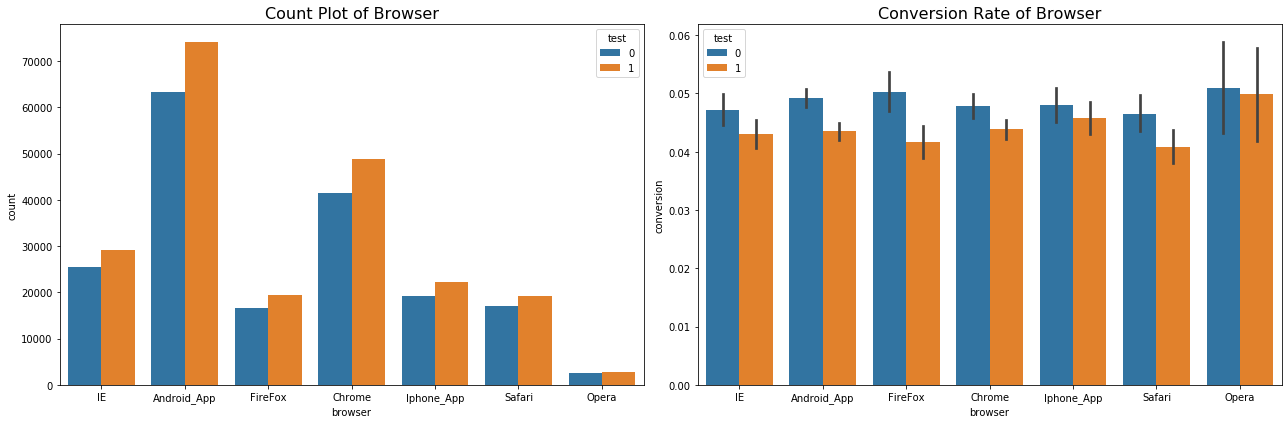

In [25]:
# Visualization of browser
fig, ax = plt.subplots(1, 2, figsize = (18,6))

sns.countplot('browser', hue = 'test', data = data, ax = ax[0])
ax[0].set_title('Count Plot of Browser', fontsize = 16)

sns.barplot('browser', 'conversion', hue = 'test', data = data, ax = ax[1])
ax[1].set_title('Conversion Rate of Browser', fontsize = 16)

plt.tight_layout()

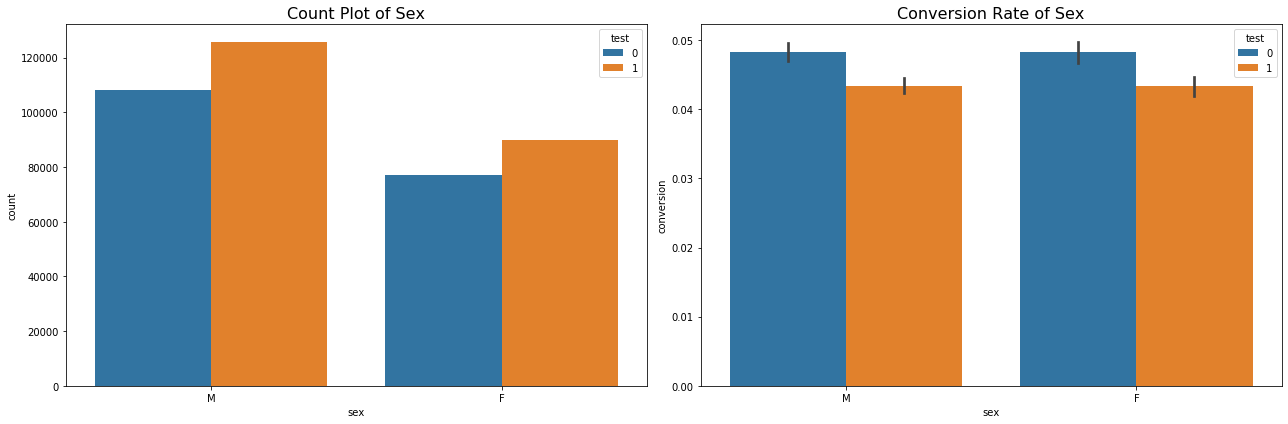

In [26]:
# Visualization of sex
fig, ax = plt.subplots(1, 2, figsize = (18,6))

sns.countplot('sex', hue = 'test', data = data, ax = ax[0])
ax[0].set_title('Count Plot of Sex', fontsize = 16)

sns.barplot('sex', 'conversion', hue = 'test', data = data, ax = ax[1])
ax[1].set_title('Conversion Rate of Sex', fontsize = 16)

plt.tight_layout()

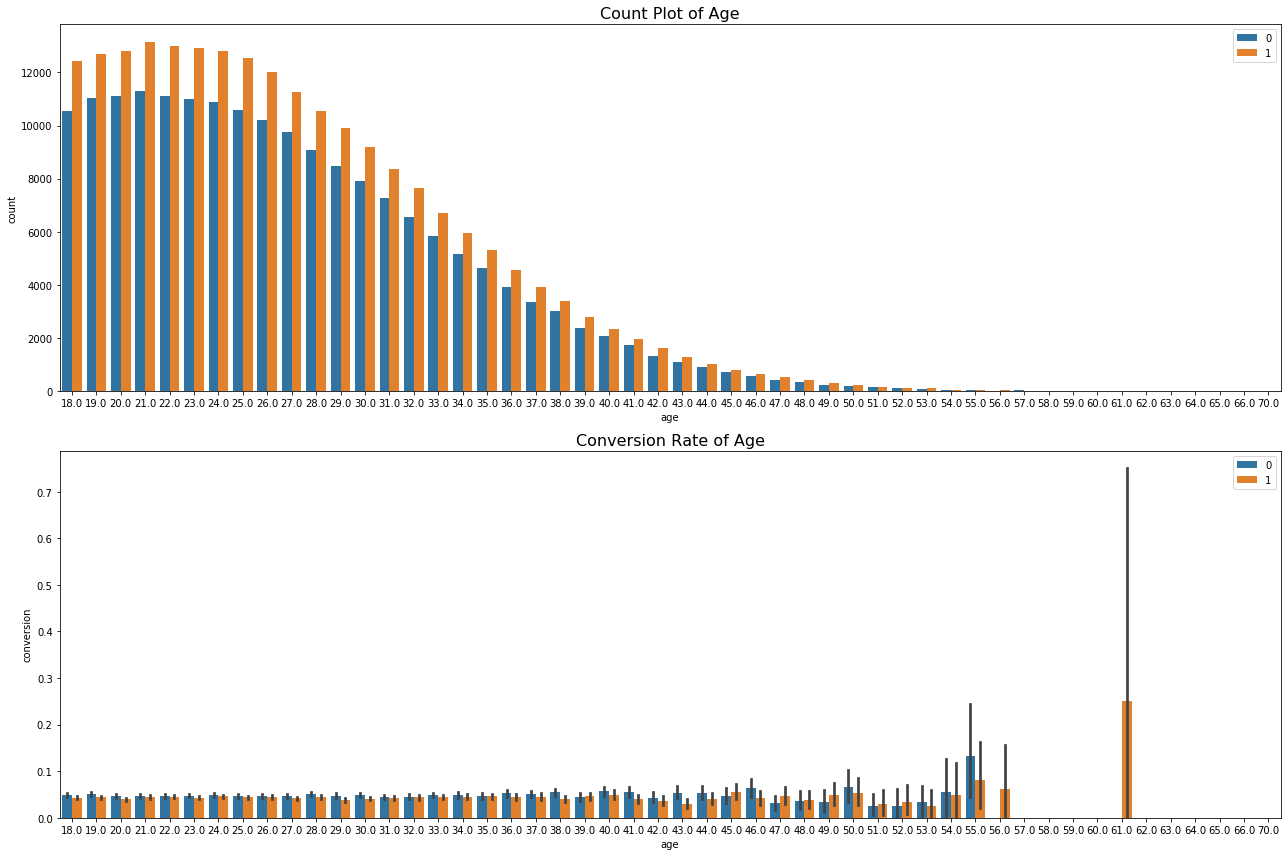

In [27]:
# Visualization of age
fig, ax = plt.subplots(2, 1, figsize = (18, 12))

sns.countplot('age', hue = 'test', data = data, ax = ax[0])
ax[0].set_title('Count Plot of Age', fontsize = 16)
ax[0].legend(loc = 1)

sns.barplot('age', 'conversion', hue = 'test', data = data, ax = ax[1])
ax[1].set_title('Conversion Rate of Age', fontsize = 16)
ax[1].legend(loc = 1)

plt.tight_layout()

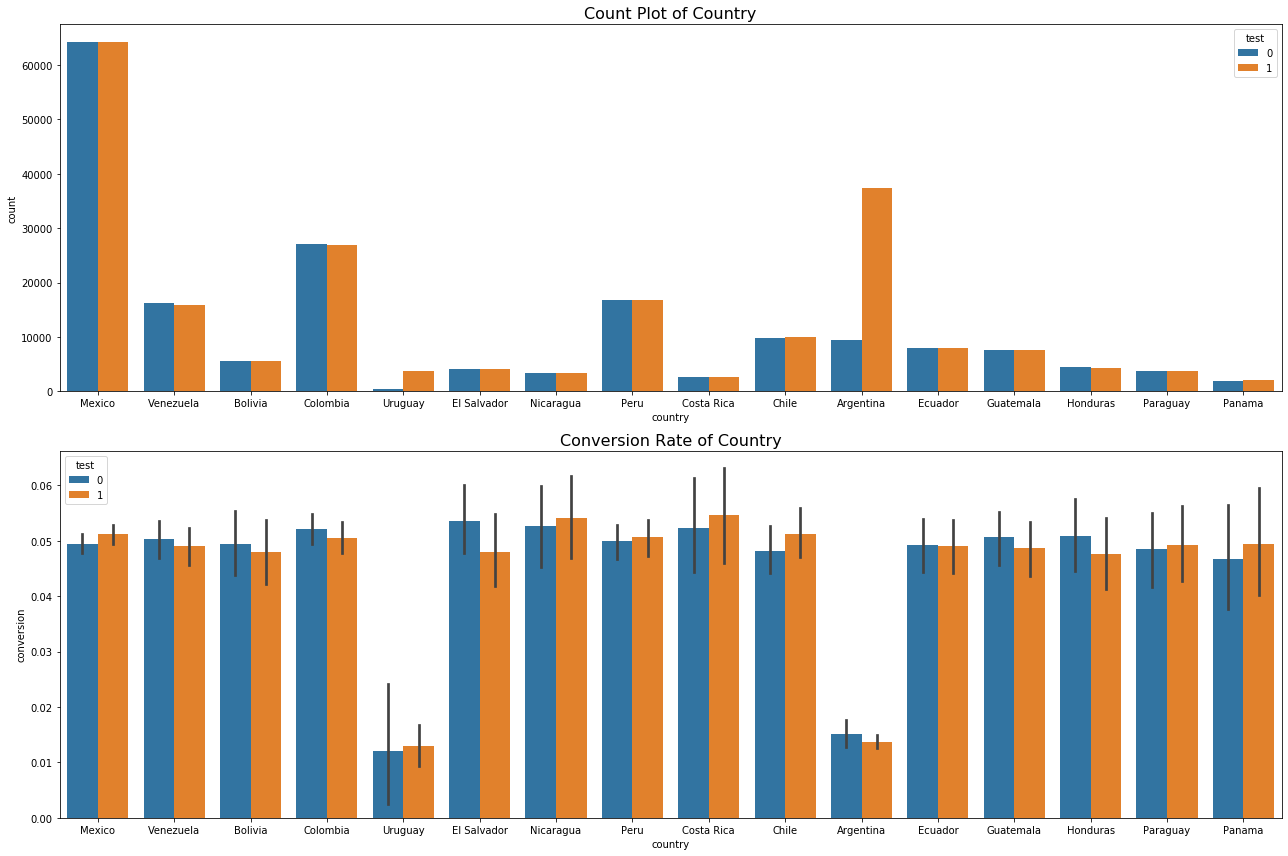

In [28]:
# Visualization of country
fig, ax = plt.subplots(2, 1, figsize = (18, 12))

sns.countplot('country', hue = 'test', data = data, ax = ax[0])
ax[0].set_title('Count Plot of Country', fontsize = 16)

sns.barplot('country', 'conversion', hue = 'test', data = data, ax = ax[1])
ax[1].set_title('Conversion Rate of Country', fontsize = 16)

plt.tight_layout()

#### Argentina and Uruguay have uneven data sample in test and control group. Test group has more data samples than control group, which represents that randomization might not be perfect.

## Check for each country

In [29]:
print('{0:15s} {1:30s} {2:30s} {3:30s}'.format('country', 'test conversion rate', 'control conversion rate', 'p value'))
print('-' * 90)

countries = [name for name in data['country'].unique() if name is not np.nan]
for country in countries:
    test_val = data.loc[(data['country'] == country) & (data['test'] == 1)]['conversion'].values
    test_mean = test_val.mean()
    
    cont_val = data.loc[(data['country'] == country) & (data['test'] == 0)]['conversion'].values
    cont_mean = cont_val.mean()
    p_val = ttest_ind(test_val, cont_val).pvalue
    
    print('{0:15s} {1:15f} {2:30f} {3:23f}'.format(country, test_mean, cont_mean, p_val))

country         test conversion rate           control conversion rate        p value                       
------------------------------------------------------------------------------------------
Mexico                 0.051186                       0.049495                0.165547
Venezuela              0.048978                       0.050344                0.573740
Bolivia                0.047901                       0.049369                0.718877
Colombia               0.050571                       0.052089                0.423733
Uruguay                0.012907                       0.012048                0.882812
El Salvador            0.047947                       0.053554                0.248251
Nicaragua              0.054177                       0.052647                0.780351
Peru                   0.050604                       0.049914                0.771950
Costa Rica             0.054738                       0.052256                0.687863
Chile            

#### After we control for country, the test clearly appears non significant. Not a great success given that the goal was to improve conversion rate, but at least we know that a localized translation didn’t make things worse!